In [1]:
from tensorflow import keras as keras
import tensorflow as tf
import csv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
IMAGE_WIDTH = 96
IMAGE_HEIGHT = 96

获取训练数据输入Xtrain  [96,96,1]

获取训练数据输出Ytrain  [-1,1,row.length-1]

In [3]:
def load_dataset():
    '''
    Load training dataset
    '''
    Xtrain = []
    Ytrain = []
    with open('/Users/szkfzx/datasets/FaceDetection/training.csv') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            img = np.zeros((IMAGE_HEIGHT,IMAGE_WIDTH,1), dtype=np.float)
            for i, val in enumerate(row["Image"].split(" ")):
                img[i//IMAGE_WIDTH,i%IMAGE_WIDTH,0] = val
            Yitem = []
            failed = False
            for coord in row:
                if coord == "Image":
                    continue
                if(row[coord].strip()==""):
                    failed = True
                    break
                Yitem.append(float(row[coord]))
            if not failed:
                Xtrain.append(img)
                Ytrain.append(Yitem)
                
    return np.array(Xtrain), np.array(Ytrain, dtype=np.float)

In [4]:
# Load dataset
Xdata, Ydata = load_dataset()
Xtrain = Xdata[:]
Ytrain = Ydata[:]

In [33]:
def show_image(X, Y):
    img = np.copy(X)
    for i in range(0,Y.shape[0],2):
        if 0 < Y[i+1] < IMAGE_HEIGHT and 0 < Y[i] < IMAGE_WIDTH:
            img[int(Y[i+1]),int(Y[i]),0] = 255
    plt.imshow(img[:,:,0])

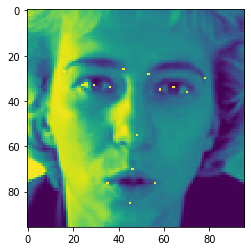

In [34]:
# Preview dataset samples
show_image(Xtrain[1], Ytrain[1])

In [7]:
# Configure Model
model = keras.Sequential([keras.layers.Flatten(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH,1)),
                         keras.layers.Dense(128, activation="relu"),
                         keras.layers.Dropout(0.1),
                         keras.layers.Dense(64, activation="relu"),
                         keras.layers.Dense(30)
                         ])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
# Compile model
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='mse',
              metrics=['mae'])

Instructions for updating:
Use tf.cast instead.


In [9]:
# Train model
model.fit(Xtrain, Ytrain, epochs=500)

Instructions for updating:
Use tf.cast instead.
Epoch 1/500
2140/2140 [==============================] - 0s 206us/sample - loss: 10847.1605 - mean_absolute_error: 63.0614
Epoch 2/500
2140/2140 [==============================] - 0s 155us/sample - loss: 699.4950 - mean_absolute_error: 20.7033
Epoch 3/500
2140/2140 [==============================] - 0s 160us/sample - loss: 337.2919 - mean_absolute_error: 13.4309
Epoch 4/500
2140/2140 [==============================] - 0s 156us/sample - loss: 277.9900 - mean_absolute_error: 12.4841
Epoch 5/500
2140/2140 [==============================] - 0s 156us/sample - loss: 242.0103 - mean_absolute_error: 11.5959
Epoch 6/500
2140/2140 [==============================] - 0s 155us/sample - loss: 209.3795 - mean_absolute_error: 10.9430
Epoch 7/500
2140/2140 [==============================] - 0s 159us/sample - loss: 181.2157 - mean_absolute_error: 10.1681
Epoch 8/500
2140/2140 [==============================] - 0s 161us/sample - loss: 186.0682 - mean_absolu

2140/2140 [==============================] - 0s 163us/sample - loss: 87.7324 - mean_absolute_error: 6.3486
Epoch 67/500
2140/2140 [==============================] - 0s 162us/sample - loss: 82.7109 - mean_absolute_error: 6.1015
Epoch 68/500
2140/2140 [==============================] - 0s 162us/sample - loss: 82.8744 - mean_absolute_error: 6.2567
Epoch 69/500
2140/2140 [==============================] - 0s 164us/sample - loss: 86.7819 - mean_absolute_error: 6.4001
Epoch 70/500
2140/2140 [==============================] - 0s 163us/sample - loss: 85.6680 - mean_absolute_error: 6.2483
Epoch 71/500
2140/2140 [==============================] - 0s 160us/sample - loss: 93.1545 - mean_absolute_error: 6.5020
Epoch 72/500
2140/2140 [==============================] - 0s 158us/sample - loss: 82.9806 - mean_absolute_error: 6.1172
Epoch 73/500
2140/2140 [==============================] - 0s 156us/sample - loss: 86.3254 - mean_absolute_error: 6.3575
Epoch 74/500
2140/2140 [=============================

2140/2140 [==============================] - 0s 154us/sample - loss: 49.2587 - mean_absolute_error: 4.9930
Epoch 135/500
2140/2140 [==============================] - 0s 151us/sample - loss: 62.5269 - mean_absolute_error: 5.6875
Epoch 136/500
2140/2140 [==============================] - 0s 152us/sample - loss: 47.4191 - mean_absolute_error: 4.8716
Epoch 137/500
2140/2140 [==============================] - 0s 151us/sample - loss: 46.6773 - mean_absolute_error: 4.8507
Epoch 138/500
2140/2140 [==============================] - 0s 152us/sample - loss: 54.0800 - mean_absolute_error: 5.2205
Epoch 139/500
2140/2140 [==============================] - 0s 152us/sample - loss: 49.9240 - mean_absolute_error: 5.0155
Epoch 140/500
2140/2140 [==============================] - 0s 152us/sample - loss: 57.7643 - mean_absolute_error: 5.5519
Epoch 141/500
2140/2140 [==============================] - 0s 152us/sample - loss: 45.5505 - mean_absolute_error: 4.8410
Epoch 142/500
2140/2140 [=====================

2140/2140 [==============================] - 0s 155us/sample - loss: 42.3383 - mean_absolute_error: 4.8025
Epoch 202/500
2140/2140 [==============================] - 0s 151us/sample - loss: 28.8273 - mean_absolute_error: 3.9915
Epoch 203/500
2140/2140 [==============================] - 0s 152us/sample - loss: 29.0655 - mean_absolute_error: 4.0205
Epoch 204/500
2140/2140 [==============================] - 0s 152us/sample - loss: 27.1109 - mean_absolute_error: 3.8493
Epoch 205/500
2140/2140 [==============================] - 0s 151us/sample - loss: 31.4259 - mean_absolute_error: 4.1508
Epoch 206/500
2140/2140 [==============================] - 0s 152us/sample - loss: 29.1956 - mean_absolute_error: 4.0157
Epoch 207/500
2140/2140 [==============================] - 0s 151us/sample - loss: 35.9762 - mean_absolute_error: 4.4110
Epoch 208/500
2140/2140 [==============================] - 0s 152us/sample - loss: 35.2451 - mean_absolute_error: 4.4456
Epoch 209/500
2140/2140 [=====================

2140/2140 [==============================] - 0s 154us/sample - loss: 13.5658 - mean_absolute_error: 2.7363
Epoch 269/500
2140/2140 [==============================] - 0s 152us/sample - loss: 13.1120 - mean_absolute_error: 2.6834
Epoch 270/500
2140/2140 [==============================] - 0s 152us/sample - loss: 14.1604 - mean_absolute_error: 2.7928
Epoch 271/500
2140/2140 [==============================] - 0s 152us/sample - loss: 12.6751 - mean_absolute_error: 2.6464
Epoch 272/500
2140/2140 [==============================] - 0s 154us/sample - loss: 12.3748 - mean_absolute_error: 2.6088
Epoch 273/500
2140/2140 [==============================] - 0s 151us/sample - loss: 12.6425 - mean_absolute_error: 2.6377
Epoch 274/500
2140/2140 [==============================] - 0s 152us/sample - loss: 12.4067 - mean_absolute_error: 2.6083
Epoch 275/500
2140/2140 [==============================] - 0s 151us/sample - loss: 13.3789 - mean_absolute_error: 2.7174
Epoch 276/500
2140/2140 [=====================

2140/2140 [==============================] - 0s 157us/sample - loss: 8.4174 - mean_absolute_error: 2.1307
Epoch 337/500
2140/2140 [==============================] - 0s 155us/sample - loss: 9.0134 - mean_absolute_error: 2.2169
Epoch 338/500
2140/2140 [==============================] - 0s 153us/sample - loss: 8.8497 - mean_absolute_error: 2.1915
Epoch 339/500
2140/2140 [==============================] - 0s 155us/sample - loss: 8.2786 - mean_absolute_error: 2.1103
Epoch 340/500
2140/2140 [==============================] - 0s 156us/sample - loss: 8.8719 - mean_absolute_error: 2.2039
Epoch 341/500
2140/2140 [==============================] - 0s 157us/sample - loss: 8.3450 - mean_absolute_error: 2.1259
Epoch 342/500
2140/2140 [==============================] - 0s 154us/sample - loss: 8.6675 - mean_absolute_error: 2.1699
Epoch 343/500
2140/2140 [==============================] - 0s 153us/sample - loss: 8.3887 - mean_absolute_error: 2.1231
Epoch 344/500
2140/2140 [=============================

Epoch 404/500
2140/2140 [==============================] - 0s 155us/sample - loss: 10.1770 - mean_absolute_error: 2.3227
Epoch 405/500
2140/2140 [==============================] - 0s 154us/sample - loss: 10.1785 - mean_absolute_error: 2.3240
Epoch 406/500
2140/2140 [==============================] - 0s 157us/sample - loss: 10.1675 - mean_absolute_error: 2.3208
Epoch 407/500
2140/2140 [==============================] - 0s 154us/sample - loss: 10.1733 - mean_absolute_error: 2.3219
Epoch 408/500
2140/2140 [==============================] - 0s 155us/sample - loss: 10.1732 - mean_absolute_error: 2.3222
Epoch 409/500
2140/2140 [==============================] - 0s 155us/sample - loss: 10.1914 - mean_absolute_error: 2.3238
Epoch 410/500
2140/2140 [==============================] - 0s 154us/sample - loss: 10.1741 - mean_absolute_error: 2.3236
Epoch 411/500
2140/2140 [==============================] - 0s 159us/sample - loss: 10.1890 - mean_absolute_error: 2.3241
Epoch 412/500
2140/2140 [=======

2140/2140 [==============================] - 0s 155us/sample - loss: 10.1777 - mean_absolute_error: 2.3220
Epoch 472/500
2140/2140 [==============================] - 0s 156us/sample - loss: 10.1823 - mean_absolute_error: 2.3233
Epoch 473/500
2140/2140 [==============================] - 0s 156us/sample - loss: 10.1797 - mean_absolute_error: 2.3234
Epoch 474/500
2140/2140 [==============================] - 0s 153us/sample - loss: 10.1902 - mean_absolute_error: 2.3250
Epoch 475/500
2140/2140 [==============================] - 0s 155us/sample - loss: 10.1844 - mean_absolute_error: 2.3235
Epoch 476/500
2140/2140 [==============================] - 0s 154us/sample - loss: 10.1726 - mean_absolute_error: 2.3218
Epoch 477/500
2140/2140 [==============================] - 0s 155us/sample - loss: 10.1724 - mean_absolute_error: 2.3221
Epoch 478/500
2140/2140 [==============================] - 0s 155us/sample - loss: 10.1820 - mean_absolute_error: 2.3238
Epoch 479/500
2140/2140 [=====================

In [10]:
# Load test data
def load_testset():
    Xtest = []
    with open('/Users/szkfzx/datasets/FaceDetection/test.csv') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            img = np.zeros((IMAGE_HEIGHT,IMAGE_WIDTH,1), dtype=np.float)
            for i, val in enumerate(row["Image"].split(" ")):
                img[i//IMAGE_WIDTH,i%IMAGE_WIDTH,0] = val
            Xtest.append(img)
                
    return np.array(Xtest)
Xtest = load_testset()

In [11]:
# Preview results on test data
def show_results(image_index):
    Ypred = model.predict(Xtest[image_index:(image_index+1)])
    show_image(Xtest[image_index], Ypred[0])

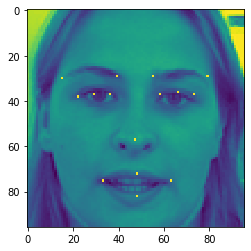

In [41]:
show_results(8)